# Australia

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/australia.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(42, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,15.0,0.0,0.0,5.0
2020-02-16,15.0,0.0,0.0,5.0
2020-02-17,15.0,0.0,0.0,5.0
2020-02-18,15.0,0.0,0.0,5.0
2020-02-19,19.0,4.0,0.0,5.0
2020-02-20,15.0,-4.0,0.0,6.0
2020-02-21,19.0,4.0,0.0,8.0
2020-02-22,21.0,2.0,0.0,10.0
2020-02-23,22.0,1.0,0.0,11.0


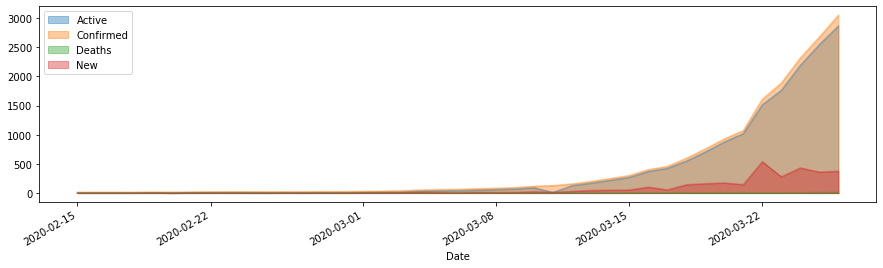

In [6]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

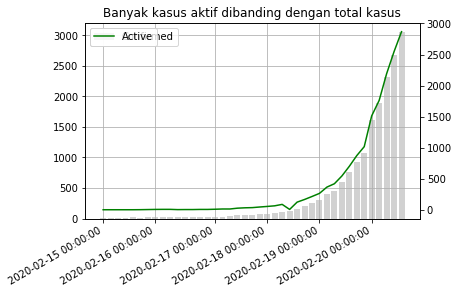

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

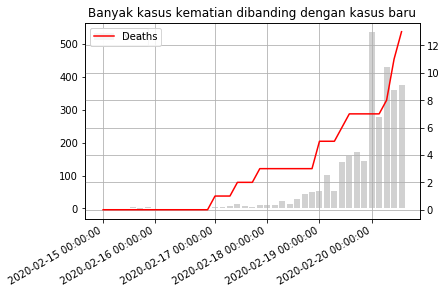

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 15-Feb-2020
- End: 26-Mar-2020
- Range: 41 Days

**Data**

In [9]:
y = np.array ((5, 5, 5, 5, 5, 6, 8, 10, 11, 11, 7, 8, 8, 10, 10, 13, 17, 17, 30, 36, 39, 49, 58, 68, 91, 10, 127, 170, 218, 268, 369, 423, 547, 703, 875, 1019, 1514, 1762, 2191, 2547, 2867))
y = y.astype('float64')
y

array([   5.,    5.,    5.,    5.,    5.,    6.,    8.,   10.,   11.,
         11.,    7.,    8.,    8.,   10.,   10.,   13.,   17.,   17.,
         30.,   36.,   39.,   49.,   58.,   68.,   91.,   10.,  127.,
        170.,  218.,  268.,  369.,  423.,  547.,  703.,  875., 1019.,
       1514., 1762., 2191., 2547., 2867.])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

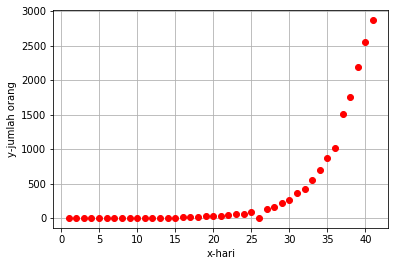

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [12]:
y = np.array ((5, 5, 5, 5, 5, 6, 8, 10, 11, 11, 7, 8, 8, 10, 10, 13, 17, 17, 30, 36, 39, 49, 58, 68, 91, 10, 127, 170, 218, 268, 369, 423, 547, 703, 875, 1019, 1514, 1762, 2191, 2547, 2867))
y = y.astype('float64')
y

array([   5.,    5.,    5.,    5.,    5.,    6.,    8.,   10.,   11.,
         11.,    7.,    8.,    8.,   10.,   10.,   13.,   17.,   17.,
         30.,   36.,   39.,   49.,   58.,   68.,   91.,   10.,  127.,
        170.,  218.,  268.,  369.,  423.,  547.,  703.,  875., 1019.,
       1514., 1762., 2191., 2547., 2867.])

In [13]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

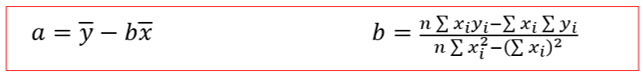

**Membuat xreg untuk plotting selanjutnya**

In [14]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

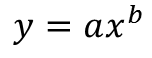

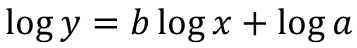

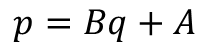

In [15]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [16]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [17]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.9380q -0.5894


**Kembalikan ke bentuk pangkat**

In [18]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.2574x^(1.9380)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [19]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.7981 dan r^2 = 0.6369


**Plot**

In [20]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.57403806e-01, 3.09623950e-01, 3.66496041e-01, 4.27995023e-01,
       4.94097970e-01, 5.64783760e-01, 6.40032820e-01, 7.19826918e-01,
       8.04148995e-01, 8.92983026e-01, 9.86313909e-01, 1.08412736e+00,
       1.18640984e+00, 1.29314847e+00, 1.40433099e+00, 1.51994569e+00,
       1.63998136e+00, 1.76442726e+00, 1.89327309e+00, 2.02650893e+00,
       2.16412525e+00, 2.30611285e+00, 2.45246285e+00, 2.60316667e+00,
       2.75821602e+00, 2.91760285e+00, 3.08131938e+00, 3.24935807e+00,
       3.42171156e+00, 3.59837273e+00, 3.77933466e+00, 3.96459059e+00,
       4.15413396e+00, 4.34795837e+00, 4.54605758e+00, 4.74842550e+00,
       4.95505619e+00, 5.16594384e+00, 5.38108278e+00, 5.60046747e+00,
       5.82409248e+00, 6.05195251e+00, 6.28404236e+00, 6.52035694e+00,
       6.76089127e+00, 7.00564046e+00, 7.25459972e+00, 7.50776434e+00,
       7.76512972e+00, 8.02669134e+00, 8.29244473e+00, 8.56238555e+00,
       8.83650950e+00, 9.11481237e+00, 9.39729002e+00, 9.68393837e+00,
      

Text(0, 0.5, 'y-banyak orang')

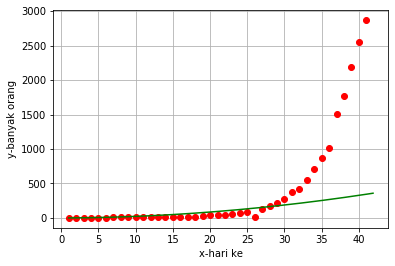

In [21]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

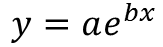

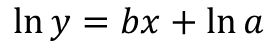

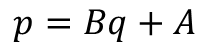

**Linearisasi**

In [22]:
y = np.array ((5, 5, 5, 5, 5, 6, 8, 10, 11, 11, 7, 8, 8, 10, 10, 13, 17, 17, 30, 36, 39, 49, 58, 68, 91, 10, 127, 170, 218, 268, 369, 423, 547, 703, 875, 1019, 1514, 1762, 2191, 2547, 2867))
y = y.astype('float64')
y

array([   5.,    5.,    5.,    5.,    5.,    6.,    8.,   10.,   11.,
         11.,    7.,    8.,    8.,   10.,   10.,   13.,   17.,   17.,
         30.,   36.,   39.,   49.,   58.,   68.,   91.,   10.,  127.,
        170.,  218.,  268.,  369.,  423.,  547.,  703.,  875., 1019.,
       1514., 1762., 2191., 2547., 2867.])

In [23]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

In [24]:
p = np.log(y)
q = x

**Hitung regresi linear**

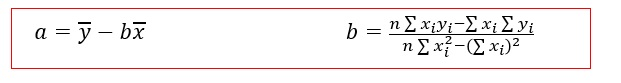

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.1699q + 0.4658


**Hitung kembali dalam bentuk bilangan berpangkat**

In [27]:
a = np.e**A
b = B

In [28]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.5932x^(0.1699)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [29]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9574 dan r^2 = 0.9167


**Plot data dan regresinya**

In [30]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [31]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([1.59323630e+00, 1.62053250e+00, 1.64829636e+00, 1.67653588e+00,
       1.70525922e+00, 1.73447466e+00, 1.76419064e+00, 1.79441573e+00,
       1.82515865e+00, 1.85642828e+00, 1.88823363e+00, 1.92058389e+00,
       1.95348840e+00, 1.98695664e+00, 2.02099828e+00, 2.05562313e+00,
       2.09084121e+00, 2.12666265e+00, 2.16309781e+00, 2.20015720e+00,
       2.23785150e+00, 2.27619161e+00, 2.31518858e+00, 2.35485367e+00,
       2.39519833e+00, 2.43623419e+00, 2.47797310e+00, 2.52042710e+00,
       2.56360845e+00, 2.60752961e+00, 2.65220324e+00, 2.69764225e+00,
       2.74385975e+00, 2.79086907e+00, 2.83868378e+00, 2.88731768e+00,
       2.93678480e+00, 2.98709942e+00, 3.03827606e+00, 3.09032948e+00,
       3.14327471e+00, 3.19712703e+00, 3.25190197e+00, 3.30761535e+00,
       3.36428325e+00, 3.42192201e+00, 3.48054826e+00, 3.54017894e+00,
       3.60083124e+00, 3.66252267e+00, 3.72527103e+00, 3.78909443e+00,
       3.85401129e+00, 3.92004034e+00, 3.98720063e+00, 4.05551156e+00,
      

Text(0, 0.5, 'y-banyak orang')

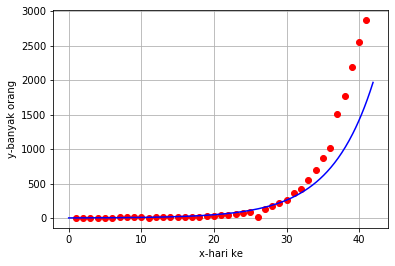

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [33]:
y = np.array ((5, 5, 5, 5, 5, 6, 8, 10, 11, 11, 7, 8, 8, 10, 10, 13, 17, 17, 30, 36, 39, 49, 58, 68, 91, 10, 127, 170, 218, 268, 369, 423, 547, 703, 875, 1019, 1514, 1762, 2191, 2547, 2867))
y = y.astype('float64')
y

array([   5.,    5.,    5.,    5.,    5.,    6.,    8.,   10.,   11.,
         11.,    7.,    8.,    8.,   10.,   10.,   13.,   17.,   17.,
         30.,   36.,   39.,   49.,   58.,   68.,   91.,   10.,  127.,
        170.,  218.,  268.,  369.,  423.,  547.,  703.,  875., 1019.,
       1514., 1762., 2191., 2547., 2867.])

In [34]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Membentuk regresi polinomial dari matriks**

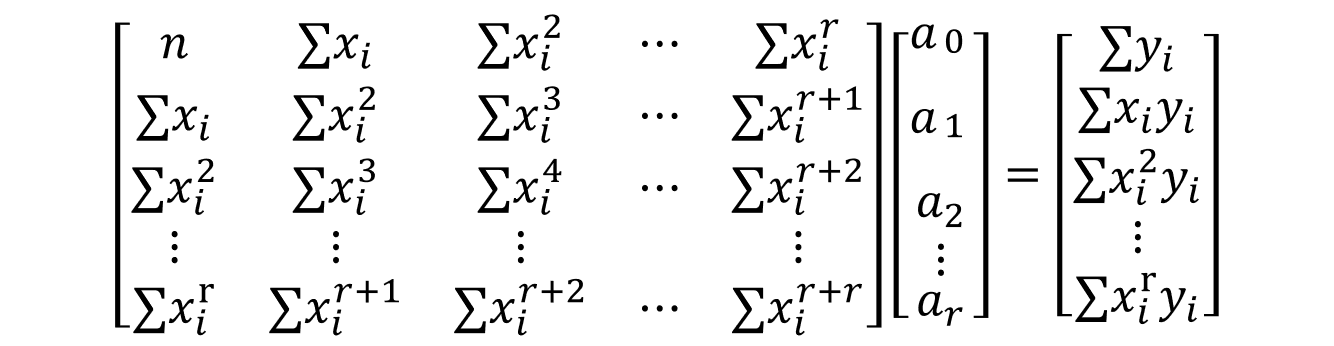

**Mendefinisikan elemen-elemen matriks kiri**

In [35]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 3.02550079e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [36]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.61420000e+04],
       [5.95152000e+05],
       [2.23075980e+07],
       [8.44917186e+08]])

**Invers matriks sisi kiri**

In [37]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 4.71264935e-01, -8.50613871e-02,  4.09795596e-03,
        -5.76017906e-05],
       [-8.50613871e-02,  1.95585587e-02, -1.04382586e-03,
         1.55298092e-05],
       [ 4.09795596e-03, -1.04382586e-03,  5.90991836e-05,
        -9.13347631e-07],
       [-5.76017906e-05,  1.55298092e-05, -9.13347631e-07,
         1.44975814e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [38]:
Y = Ainv.dot(B)
print(Y)

[[-2.70484694e+02]
 [ 1.03409398e+02]
 [-8.42812475e+00]
 [ 1.87452858e-01]]


In [39]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [40]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.1875x^3 + -8.4281X^2 + 103.4094x + -270.4847


In [41]:
y

array([   5.,    5.,    5.,    5.,    5.,    6.,    8.,   10.,   11.,
         11.,    7.,    8.,    8.,   10.,   10.,   13.,   17.,   17.,
         30.,   36.,   39.,   49.,   58.,   68.,   91.,   10.,  127.,
        170.,  218.,  268.,  369.,  423.,  547.,  703.,  875., 1019.,
       1514., 1762., 2191., 2547., 2867.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [42]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9894 dan r^2 = 0.9167


**Plot**

Text(0, 0.5, 'y')

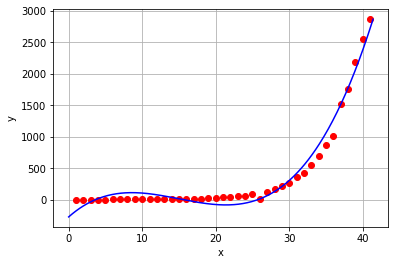

In [43]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

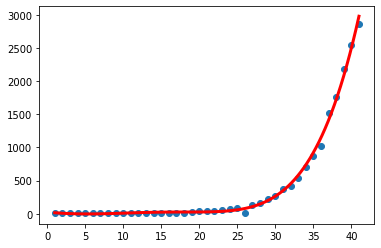

In [44]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [45]:
print (regpoly)

           5            4            3         2
0.0001077 x - 0.004132 x + 0.009419 x + 1.166 x - 11.22 x + 25.9


In [46]:
print(r2_score(y, regpoly(x)))

0.9966917321593413


**Selesai**

### Total Death

- Start: 1-Mar-2020
- End: 26-Mar-2020
- Range: 27 Days

**Data**

In [47]:
y = np.array ((1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 7, 7, 7, 7, 7, 8, 11, 13))
y = y.astype('float64')
y

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  7.,  8., 11., 13.])

In [48]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

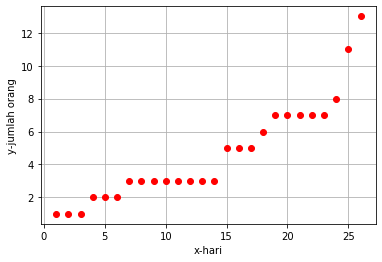

In [49]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [50]:
y = np.array ((1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 7, 7, 7, 7, 7, 8, 11, 13))
y = y.astype('float64')
y

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  7.,  8., 11., 13.])

In [51]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

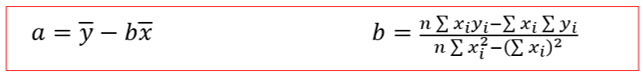

**Membuat xreg untuk plotting selanjutnya**

In [52]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

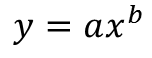

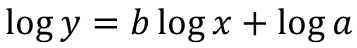

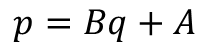

In [53]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [54]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [55]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.7911q -0.2373


**Kembalikan ke bentuk pangkat**

In [56]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.5791x^(0.7911)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [57]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9367 dan r^2 = 0.8774


**Plot**

In [58]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([0.5790604 , 0.62441082, 0.6689069 , 0.71263418, 0.75566371,
       0.79805542, 0.83986042, 0.88112281, 0.92188098, 0.96216865,
       1.00201561, 1.04144838, 1.08049071, 1.11916396, 1.15748746,
       1.19547876, 1.23315386, 1.27052741, 1.30761287, 1.34442264,
       1.38096817, 1.41726008, 1.45330823, 1.48912179, 1.52470934,
       1.5600789 , 1.59523796, 1.63019359, 1.6649524 , 1.69952066,
       1.73390423, 1.76810871, 1.80213935, 1.83600114, 1.86969883,
       1.90323691, 1.93661966, 1.96985115, 2.00293527, 2.03587572,
       2.06867603, 2.10133959, 2.13386964, 2.16626927, 2.19854145,
       2.23068903, 2.26271474, 2.29462122, 2.32641097, 2.35808644,
       2.38964996, 2.42110378, 2.45245007, 2.48369093, 2.51482837,
       2.54586435, 2.57680075, 2.60763939, 2.63838204, 2.66903039,
       2.69958609, 2.73005075, 2.76042591, 2.79071308, 2.8209137 ,
       2.85102919, 2.88106093, 2.91101023, 2.94087839, 2.97066668,
       3.0003763 , 3.03000845, 3.05956429, 3.08904492, 3.11845

Text(0, 0.5, 'y-banyak orang')

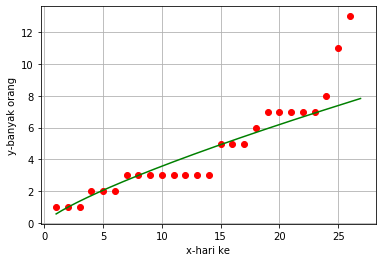

In [59]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

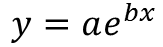

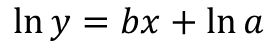

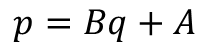

**Linearisasi**

In [60]:
y = np.array ((1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 7, 7, 7, 7, 7, 8, 11, 13))
y = y.astype('float64')
y

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  7.,  8., 11., 13.])

In [61]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

In [62]:
p = np.log(y)
q = x

**Hitung regresi linear**

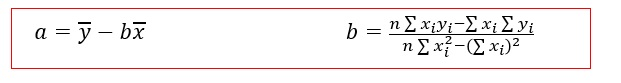

In [63]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [64]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.0893q + 0.1128


**Hitung kembali dalam bentuk bilangan berpangkat**

In [65]:
a = np.e**A
b = B

In [66]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.1194x^(0.0893)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [67]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9647 dan r^2 = 0.9306


**Plot data dan regresinya**

In [68]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [69]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([ 1.11936523,  1.12940083,  1.1395264 ,  1.14974274,  1.16005069,
        1.17045104,  1.18094464,  1.19153232,  1.20221493,  1.21299331,
        1.22386832,  1.23484083,  1.24591171,  1.25708185,  1.26835213,
        1.27972346,  1.29119674,  1.30277287,  1.3144528 ,  1.32623744,
        1.33812773,  1.35012463,  1.36222908,  1.37444205,  1.38676452,
        1.39919747,  1.41174188,  1.42439876,  1.43716911,  1.45005395,
        1.46305431,  1.47617123,  1.48940575,  1.50275891,  1.5162318 ,
        1.52982547,  1.54354102,  1.55737954,  1.57134212,  1.58542988,
        1.59964395,  1.61398545,  1.62845553,  1.64305534,  1.65778604,
        1.67264881,  1.68764484,  1.7027753 ,  1.71804142,  1.73344441,
        1.74898549,  1.7646659 ,  1.7804869 ,  1.79644973,  1.81255568,
        1.82880603,  1.84520207,  1.86174511,  1.87843646,  1.89527746,
        1.91226944,  1.92941377,  1.9467118 ,  1.96416491,  1.9817745 ,
        1.99954197,  2.01746873,  2.03555621,  2.05380586,  2.07

Text(0, 0.5, 'y-banyak orang')

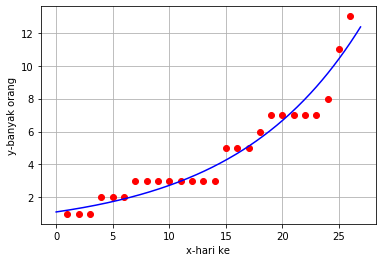

In [70]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [71]:
y = np.array ((1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 7, 7, 7, 7, 7, 8, 11, 13))
y = y.astype('float64')
y

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  7.,  8., 11., 13.])

In [72]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

**Membentuk regresi polinomial dari matriks**

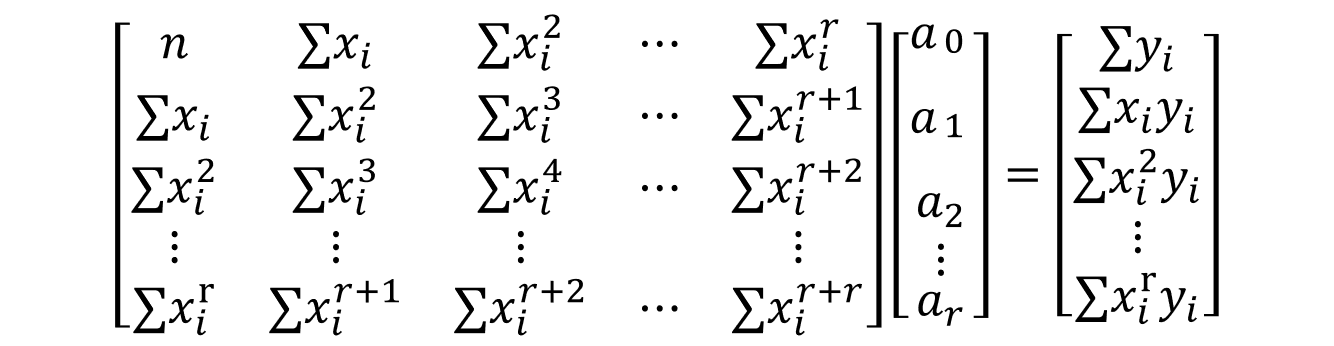

**Mendefinisikan elemen-elemen matriks kiri**

In [73]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]])

**Mendefinisikan elemen-elemen matriks kanan**

In [74]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.2100e+02],
       [2.1760e+03],
       [4.4510e+04],
       [9.6901e+05]])

**Invers matriks sisi kiri**

In [75]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 8.33110368e-01, -2.35061315e-01,  1.77257525e-02,
        -3.90189521e-04],
       [-2.35061315e-01,  8.25185444e-02, -6.83724072e-03,
         1.58645748e-04],
       [ 1.77257525e-02, -6.83724072e-03,  5.99105209e-04,
        -1.44158690e-05],
       [-3.90189521e-04,  1.58645748e-04, -1.44158690e-05,
         3.55947382e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [76]:
Y = Ainv.dot(B)
print(Y)

[[ 0.18862876]
 [ 0.52166548]
 [-0.0359681 ]
 [ 0.00126646]]


In [77]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [78]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.0013x^3 + -0.0360X^2 + 0.5217x + 0.1886


In [79]:
y

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  7.,  8., 11., 13.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [80]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9723 dan r^2 = 0.9306


**Plot**

Text(0, 0.5, 'y')

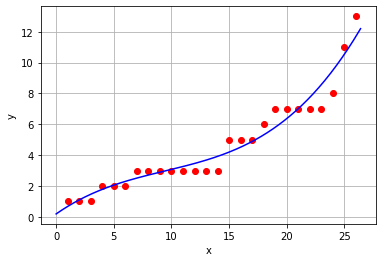

In [81]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

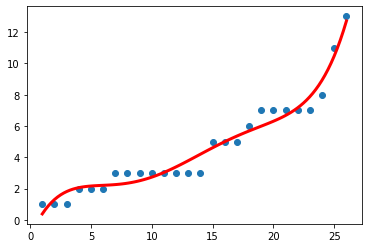

In [82]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [83]:
print (regpoly)

           5            4           3          2
2.579e-05 x - 0.001657 x + 0.03897 x - 0.3972 x + 1.859 x - 1.115


In [84]:
print(r2_score(y, regpoly(x)))

0.9626955428786206


**Selesai**